In [ ]:
import pandas as pd


In [ ]:
ls drive/MyDrive/Colab\ Notebooks

 BOS_November06_2022.csv            PythonCourse24/
'Copy of Welcome To Colaboratory'   setForLife.csv
 Finances22.ipynb                   set-for-life-draw-history-4Mar24.csv
'finances Nov 22.gsheet'            SetForLife.ipynb
 NewburyFloodDataFlowOnly.csv       SFL_AI.ipynb
 NewburyFloodData.ipynb


In [ ]:
ls

drive/  sample_data/


In [ ]:
sfl_df = pd.read_csv("./drive/MyDrive/Colab Notebooks/setForLife.csv")

In [ ]:
#print(sfl_df)

In [ ]:
sfl_df = sfl_df.drop(columns = ["Ball Set", "Machine", "DrawNumber"])

In [ ]:
#sfl_df = sfl_df[["DrawDate", "Ball 1", "Ball 2", "Ball 3", "Ball 4", "Ball 5", "Life Ball"]]

In [ ]:
sfl_df.head()

,DrawDate,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball
0,18-Apr-2024,18,35,6,26,41,5
1,15-Apr-2024,1,21,27,3,22,10
2,11-Apr-2024,11,13,19,42,27,8
3,08-Apr-2024,36,43,3,5,6,1
4,04-Apr-2024,17,41,2,16,9,3


In [ ]:
sfl_df["DrawDate"] = pd.to_datetime(sfl_df["DrawDate"])

In [ ]:
sfl_df.set_index('DrawDate',inplace=True)

In [ ]:
sfl_df.head()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball
DrawDate,,,,,,
2024-04-18,18,35,6,26,41,5
2024-04-15,1,21,27,3,22,10
2024-04-11,11,13,19,42,27,8
2024-04-08,36,43,3,5,6,1
2024-04-04,17,41,2,16,9,3


In [ ]:
print(sfl_df.iloc[0][0])


18


In [ ]:
def createLongList(df):
  #numbers is an array of arrays, each week a new array
  numbers = []
  #longlist has all the numbers in a row, to make the chart
  longList = []
  #i and j give the coordinates of the dataframe, going from the second from the left, hence j 1,6
  for i in range(len(df)):
    #print(i)
    tempList = []
    for j in range(0,5):
      #print(i)
      #print(j)
      num = df.iloc[i][j]
      tempList.append(num)
      longList.append(num)
    tempList.sort()
    #templist is now an array of that weeks numbers, sorted
    numbers.append(tempList)
  return numbers, longList




In [ ]:
numbers, longList = createLongList(sfl_df)

In [ ]:
def createLifeBalls(df):
  lifeBalls = []

  for i in range(len(df)):
    tempList = []

    for j in range(5,6):
      lifeBalls.append(df.iloc[i][j])
  return lifeBalls


In [ ]:
lifeBalls = createLifeBalls(sfl_df)

In [ ]:
#numbers

In [ ]:
#lifeBalls

In [ ]:
#num_df = pd.DataFrame(numbers, columns = ["B1", "B2", "B3", "B4", "B5"] )
#num_df.head()
#what's this about???? I can't remember why I did it.

In [ ]:
lengLL = len(longList)
lengLL

325

In [ ]:
import collections

In [ ]:
#This counts how many of each number there are in longList
counter = collections.Counter(longList)
sortedDict = dict(sorted(counter.items())) #again, not necessary!

lifeBallsSorted = lifeBalls.copy()
lifeBallsSorted.sort()
counterLife = collections.Counter(lifeBallsSorted)
lifeDict = dict(sorted(counterLife.items())) #it seems to already be sorted but just in case!

In [ ]:
lifeDict

{1: 10, 2: 6, 3: 4, 4: 7, 5: 9, 6: 7, 7: 3, 8: 5, 9: 9, 10: 5}

In [ ]:
####Matplot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_dictionary_bar(dictionary, x, title):
  keys = dictionary.keys()
  values = dictionary.values()
  plt.bar(keys, values)
  plt.xlabel(x)
  plt.ylabel('Occurrence')
  plt.title(title)

  plt.show()

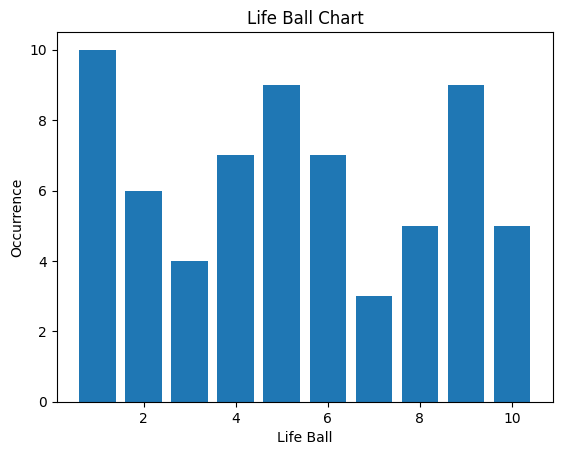

In [ ]:
plot_dictionary_bar(counterLife, "Life Ball", "Life Ball Chart")

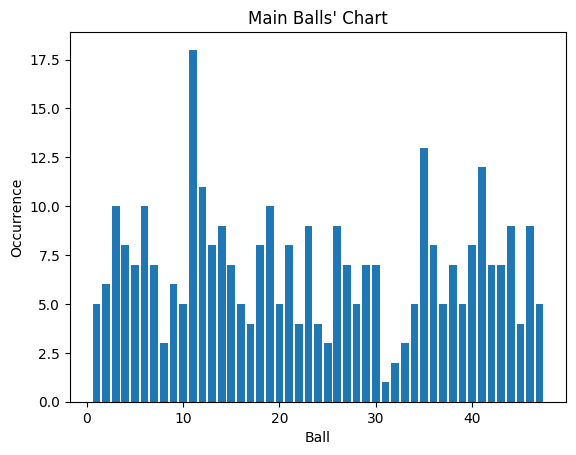

In [ ]:
plot_dictionary_bar(counter, "Ball", "Main Balls' Chart")

In [ ]:
#numbers

In [ ]:
counterBalls = collections.Counter(longList)
#counterBalls

In [ ]:
#create array of values existing in the dict just to view
oSet = set(())
for key in counterBalls:
  for x in range (1, (numMax+1)):
    if counterBalls[key] == x:
      oSet.add(x)
print(oSet)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18}


In [ ]:
def findMax(myDict):
  #find max value in dict
  numMax = 0
  for key in myDict:
    if myDict[key] > numMax:
      numMax = myDict[key]
  return numMax


In [ ]:
#so now iterate through sortedNumMax list and if counterBalls[sortedNumMax] matches
#counterBalls[key], add it to the array. Then when finished, add array to array of arrays


def viewFrequency(myDict):
  occArr = []
  numMax = findMax(myDict)
  for x in range(1, (numMax+1)):
    #print(f"oSet: {x}")
    tempArr = []
    for key in myDict:
      if myDict[key] == x:
        tempArr.append(key)
        #print(key)
    if not tempArr:
      #if tempArr is empty, add a 0 as filler, or it ends up leaving it out
      tempArr.append(0)
    tempArr.sort()
    occArr.append(tempArr)
  return occArr, numMax




In [ ]:
occArr, numMax = viewFrequency(counterBalls)
print(occArr)

[[31], [32], [8, 25, 33], [17, 22, 24, 45], [1, 10, 16, 20, 28, 34, 37, 39, 47], [2, 9], [5, 7, 15, 27, 29, 30, 38, 42, 43], [4, 13, 18, 21, 36, 40], [14, 23, 26, 44, 46], [3, 6, 19], [12], [41], [35], [0], [0], [0], [0], [11]]


In [ ]:
##finally, create the viewer by adding each array to it's corresponding occurence
def createViewer(arrOcc, nMax):
  viewDictAll = {}
  for x in range(1, (nMax + 1)):
    viewDictAll[x] = arrOcc[x-1]
  return viewDictAll


In [ ]:
viewDictAll = createViewer(occArr, numMax)

In [ ]:
numbers_ten, longList_ten = createLongList(sfl_ten_df)

In [ ]:
lifeBalls_ten = createLifeBalls(sfl_ten_df)

In [ ]:
#This counts how many of each number there are in longList
counter_ten = collections.Counter(longList_ten)

lifeBallsSorted_ten = lifeBalls_ten.copy()
lifeBallsSorted_ten.sort()
counterLife_ten = collections.Counter(lifeBallsSorted_ten)

In [ ]:
tenArr, max_ten = viewFrequency(counter_ten)

In [ ]:
viewDictLast10 = createViewer(tenArr, max_ten)

In [ ]:
viewDictLast10

{1: [1, 4, 9, 10, 13, 14, 16, 17, 21, 22, 23, 24, 30, 36, 38, 40, 42, 44],
 2: [2, 5, 6, 18, 27, 43],
 3: [3, 26, 35, 41],
 4: [11, 19]}

In [ ]:
viewDictAll

{1: [31],
 2: [32],
 3: [8, 25, 33],
 4: [17, 22, 24, 45],
 5: [1, 10, 16, 20, 28, 34, 37, 39, 47],
 6: [2, 9],
 7: [5, 7, 15, 27, 29, 30, 38, 42, 43],
 8: [4, 13, 18, 21, 36, 40],
 9: [14, 23, 26, 44, 46],
 10: [3, 6, 19],
 11: [12],
 12: [41],
 13: [35],
 14: [0],
 15: [0],
 16: [0],
 17: [0],
 18: [11]}

In [ ]:
numbers

[[6, 18, 26, 35, 41],
 [1, 3, 21, 22, 27],
 [11, 13, 19, 27, 42],
 [3, 5, 6, 36, 43],
 [2, 9, 16, 17, 41],
 [19, 30, 35, 40, 44],
 [5, 10, 19, 26, 41],
 [11, 23, 24, 26, 35],
 [3, 4, 11, 14, 18],
 [2, 11, 19, 38, 43],
 [4, 11, 22, 25, 34],
 [12, 21, 30, 35, 44],
 [11, 29, 32, 34, 42],
 [7, 15, 25, 30, 38],
 [4, 6, 28, 29, 45],
 [3, 10, 21, 24, 39],
 [16, 17, 19, 23, 38],
 [7, 11, 12, 36, 46],
 [5, 11, 25, 30, 42],
 [6, 20, 27, 29, 36],
 [13, 19, 26, 37, 43],
 [3, 4, 8, 10, 28],
 [3, 7, 11, 23, 29],
 [7, 29, 35, 40, 46],
 [7, 20, 23, 36, 44],
 [6, 23, 26, 27, 34],
 [9, 15, 22, 40, 44],
 [4, 14, 21, 35, 36],
 [15, 16, 23, 35, 42],
 [19, 31, 37, 39, 40],
 [12, 14, 26, 39, 46],
 [1, 20, 26, 36, 38],
 [13, 14, 35, 36, 41],
 [2, 15, 21, 41, 47],
 [4, 8, 17, 18, 21],
 [1, 13, 18, 32, 47],
 [12, 13, 16, 21, 44],
 [12, 14, 20, 28, 41],
 [2, 3, 37, 39, 45],
 [4, 11, 16, 46, 47],
 [5, 40, 42, 43, 46],
 [10, 12, 35, 37, 47],
 [10, 14, 19, 35, 41],
 [6, 9, 11, 22, 46],
 [12, 18, 30, 40, 41],
 [3, 1

In [ ]:
lifeBalls

[5,
 10,
 8,
 1,
 3,
 2,
 4,
 2,
 7,
 6,
 6,
 9,
 9,
 9,
 4,
 2,
 5,
 9,
 6,
 8,
 5,
 1,
 7,
 8,
 4,
 2,
 5,
 5,
 1,
 4,
 4,
 6,
 9,
 2,
 6,
 1,
 10,
 9,
 1,
 1,
 4,
 1,
 1,
 5,
 8,
 10,
 9,
 10,
 8,
 7,
 10,
 1,
 5,
 6,
 4,
 5,
 3,
 2,
 3,
 9,
 1,
 9,
 5,
 3,
 6]

In [ ]:
march14 = [13, 17, 31, 41, 46]
march22 = [4, 15, 21, 27, 38]
lifeMarch21 = 6

lifeApril18 = 4
april18 = [6, 14, 30, 36, 41]
april21 = [12, 19, 30, 36, 43]
lifeApril21 = 4

In [ ]:
sfl_ten_df = sfl_df.head(10)
sfl_ten_df.tail()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball
DrawDate,,,,,,
2024-04-01,35,44,40,30,19,2
2024-03-28,5,19,41,10,26,4
2024-03-25,23,11,24,26,35,2
2024-03-21,18,14,4,11,3,7
2024-03-18,19,11,2,38,43,6


In [ ]:
#calculate odds!!!!
#    n!
#   -----
#    n! (n - r)!

#where n = total number of balls and r = balls drawn
#so it's 47! / 5! * (47 - 5)
# 47! / 5! * 42!

#but this only calcalates getting the 5 numbers, not the

In [ ]:
def findFactorial(number):
  factorial = number
  num = (number - 1)
  while num > 0:
    factorial = num * factorial
    num -= 1
  return factorial


In [ ]:
fact47 = findFactorial(47)
fact5 = findFactorial(5)
fact42 = findFactorial(42)
fiveBallsOdds = fact47 / (fact5 * fact42)
fiveBallsOdds

1533939.0